# Ejercicio 1 - Implementación del algoritmo Deutsch-Jozsa

En este primer bloque de código se implementará el algoritmo de Deutsch-Jozsa con 2 qubits. Se definirá un método para así poder realizar las pruebas de manera más sencilla y rápida. Se ha generalizado para n bits donde se creará un registro de qubits de $n + 1$ para acomodar el qubit de ancilla. El segundo argumento que se le pasa al método es el oráculo. El tercero es un circuito, función que se creará como puerta y se añadirá a los circuitos de datos para codificar la función que queremos comprobar si es balanceada o constante.

Además, se han definido 2 funciones genéricas de oráculo para funciones balanceadas y equilibradas. Estos oráculos son de n bits.

In [58]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def deutsch_jozsa_nqb(n, oracle):
    # Creamos un registro cuántico de n + 1 qubits (n qubits de entrada y 1 qubit ancilla)
    qreg = QuantumRegister(n + 1, 'q')
    # Creamos un registro clásico de n bits
    creg = ClassicalRegister(n, 'c')
    circ = QuantumCircuit(qreg, creg)
    
    # Inicializamos el qubit ancilla en |1>
    circ.x(qreg[n])
    circ.h(qreg[n])
    
    # Aplicamos Hadamard a los qubits de entrada
    for i in range(n):
        circ.h(qreg[i])
    
    # Aplicamos el oraculo
    circ.compose(oracle, inplace=True)
    
    # Aplicamos Hadamard a los qubits de entrada otra vez
    for i in range(n):
        circ.h(qreg[i])
    
    # Medimos los qubits de entrada
    for i in range(n):
        circ.measure(qreg[i], creg[i])
    
    return circ


## Con 2 qubits de datos

Lo primero que se va a hacer es generar las funciones balanceadas o constantes. Después aplicamos el método definido arriba aplicando el oráculo correspondiente y comprobamos los resultados.

### Primera función constante
La primera función constante que se va a implementar es: $$f_{c1} \rightarrow f(x) = 0$$

### Segunda función constante 
La segunda función constante que se va a implementar es: $$f_{c2} \rightarrow f(x) = 1$$

### Primera función balanceada
La primera función balanceada que se va a implementar es: $$f_{b1} \rightarrow f_{b1}(00) = 1; f_{b1}(11) = 1$$

Para poder implementar este oráculo basta con aplicar 2 $CNOTs$ al bit ancilla con los controles en los qubits de datos. 

### Segunda función balanceada 
La segunda función balanceada que se va a implementar es: $$f_{b2} \rightarrow f_{b2}(00) = 0; f_{b1}(11) = 0$$

Para poder implementar este oráculo tendremos que hacer lo mismo que en la primera función pero esta vez aplicando también una puerta $X$.

In [59]:
n = 2

# Definimos la primera función oráculo constante
oracle_const1 = QuantumCircuit(n + 1)
oracle_const1 = oracle_const1.to_gate(label='f_c1')

oracle_const2 = QuantumCircuit(n + 1)
oracle_const2 = oracle_const2.to_gate(label='f_c2')

oracle_balanced1 = QuantumCircuit(n + 1)
oracle_balanced1.cx(0, n)
oracle_balanced1.cx(1, n)
oracle_balanced1 = oracle_balanced1.to_gate(label='f_b1')

oracle_balanced2 = QuantumCircuit(n + 1)
oracle_balanced2.cx(0, n)
oracle_balanced2.cx(1, n)
oracle_balanced2.x(n)

oracle_balanced2 = oracle_balanced2.to_gate(label='f_b2')

circ_2qb_c1 = deutsch_jozsa_nqb(n, oracle_const1)
circ_2qb_c2 = deutsch_jozsa_nqb(n, oracle_const2)
circ_2qb_b1 = deutsch_jozsa_nqb(n, oracle_balanced1)
circ_2qb_b2 = deutsch_jozsa_nqb(n, oracle_balanced2)

### Función constante 1

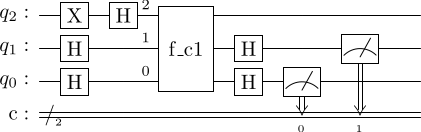

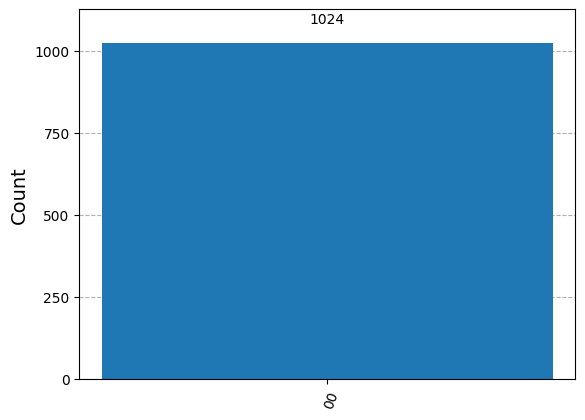

In [60]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_2qb_c1.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_2qb_c1, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_2qb_c1))

### Funcion cónstante 2

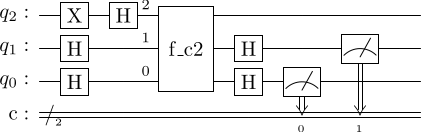

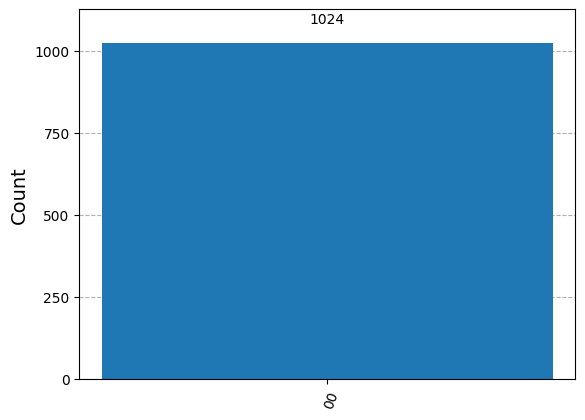

In [61]:
# Mostramos, simulamos y presentamos resultados del segundo circuito cte
display(circ_2qb_c2.draw(output='latex', reverse_bits=True))
job = simulator.run(transpile(circ_2qb_c2, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_2qb_c2))

### Función balanceada 1

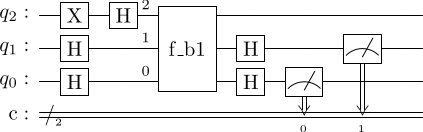

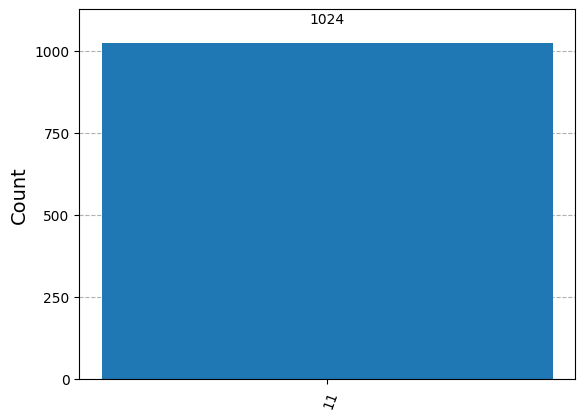

In [62]:
# Mostramos, simulamos y presentamos resultados del primer circuito balanceado
display(circ_2qb_b1.draw(output='latex', reverse_bits=True))
job = simulator.run(transpile(circ_2qb_b1, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_2qb_b1))

### Función balanceada 2

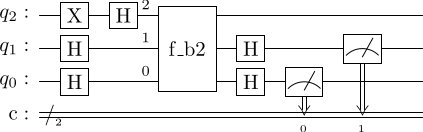

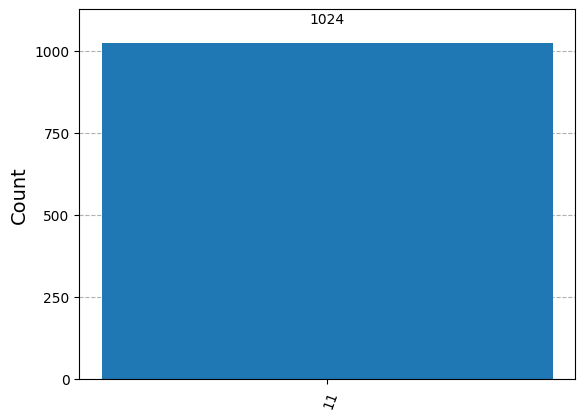

In [63]:
# Mostramos, simulamos y presentamos resultados del cuarto circuito balanceado
display(circ_2qb_b2.draw(output='latex', reverse_bits=True))
job = simulator.run(transpile(circ_2qb_b2, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_2qb_b2))

## Con 3 qubits de datos

Lo primero que se va a hacer es generar las funciones balanceadas o constantes. Después aplicamos el método definido arriba aplicando el oráculo correspondiente y comprobar los resultados.

### Primera función constante
La primera función constante que se va a implementar es: $$f_{c1} \rightarrow f(x) = 0$$

### Segunda función constante 
La segunda función constante que se va a implementar es: $$f_{c2} \rightarrow f(x) = 1$$

### Primera función balanceada
La primera función balanceada que se va a implementar es: $$f_{b1} \rightarrow f_{b1}(00) = 1; f_{b1}(11) = 1$$

Para poder implementar este oráculo basta con aplicar 2 $CNOTs$ al bit ancilla con los controles en los qubits de datos. 

### Segunda función balanceada 
La segunda función balanceada que se va a implementar es: $$f_{b2} \rightarrow f_{b2}(00) = 0; f_{b1}(11) = 0$$

Para poder implementar este oráculo tendremos que usar hacer lo mismo que en la primera función pero esta vez aplicando también una puerta $X$.

In [64]:
n = 3

# Definimos la primera función oráculo constante
oracle_const1 = QuantumCircuit(n + 1)
oracle_const1 = oracle_const1.to_gate(label='f_c1')

oracle_const2 = QuantumCircuit(n + 1)
oracle_const2 = oracle_const2.to_gate(label='f_c2')

oracle_balanced1 = QuantumCircuit(n + 1)
for i in range(n):
    oracle_balanced1.cx(i, n)
oracle_balanced1 = oracle_balanced1.to_gate(label='f_b1')

oracle_balanced2 = QuantumCircuit(n + 1)
for i in range(n):
    oracle_balanced2.cx(i, n)
oracle_balanced2.x(n)

oracle_balanced2 = oracle_balanced2.to_gate(label='f_b2')

circ_3qb_c1 = deutsch_jozsa_nqb(n, oracle_const1)
circ_3qb_c2 = deutsch_jozsa_nqb(n, oracle_const2)
circ_3qb_b1 = deutsch_jozsa_nqb(n, oracle_balanced1)
circ_3qb_b2 = deutsch_jozsa_nqb(n, oracle_balanced2)

### Primera función constante

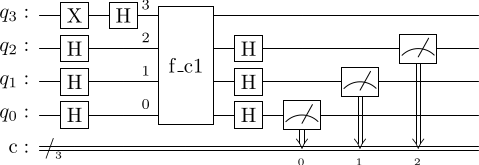

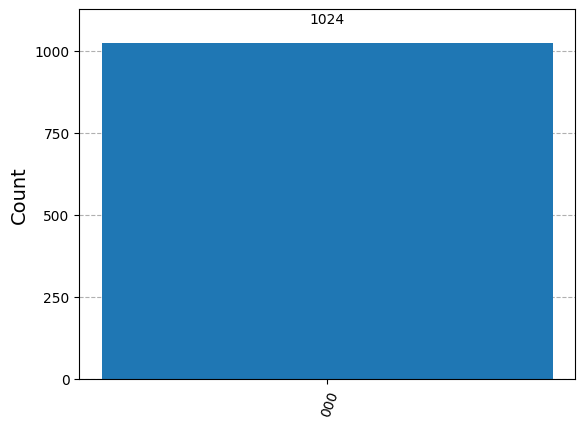

In [65]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_3qb_c1.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_3qb_c1, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_3qb_c1))

### Segunda función constante

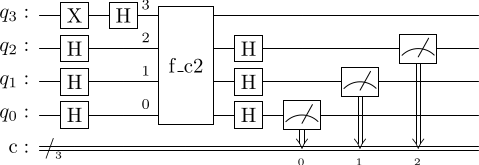

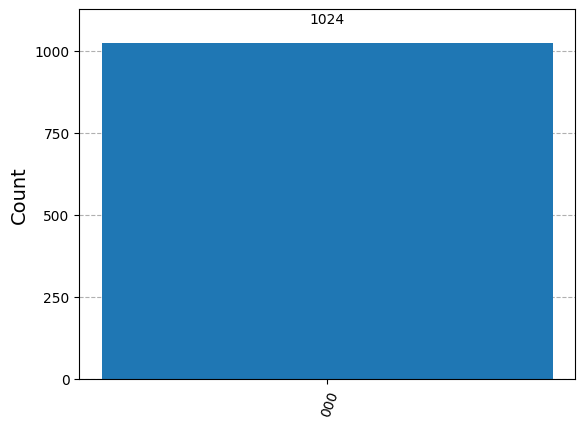

In [66]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_3qb_c2.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_3qb_c2, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_3qb_c2))

### Primera Función balanceada 

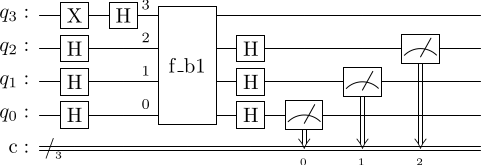

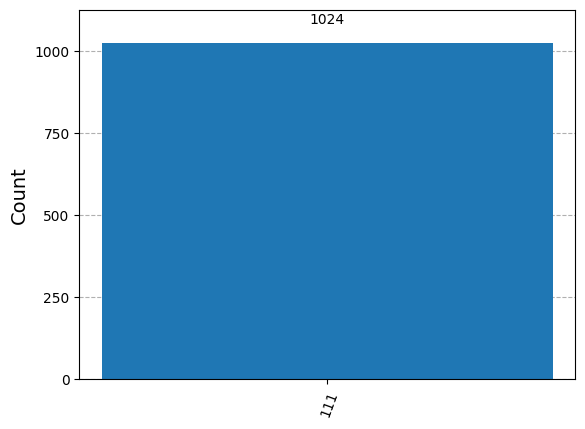

In [67]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_3qb_b1.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_3qb_b1, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_3qb_b1))

### Segunda función balanceada

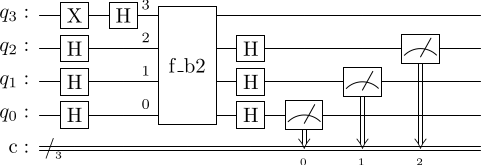

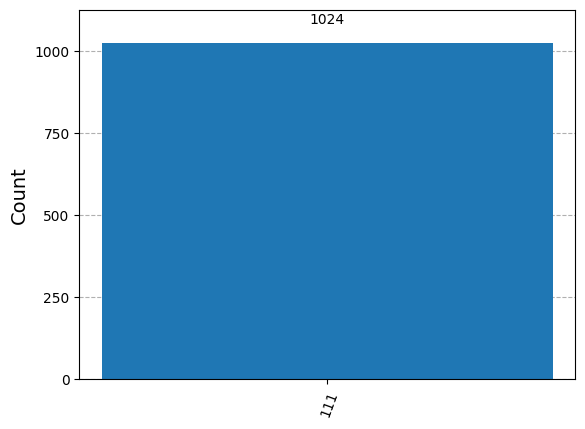

In [68]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_3qb_b2.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_3qb_b2, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_3qb_b2))

# Con 4 qubits de datos

In [69]:
n = 4

# Definimos la primera función oráculo constante
oracle_const1 = QuantumCircuit(n + 1)
oracle_const1 = oracle_const1.to_gate(label='f_c1')

oracle_const2 = QuantumCircuit(n + 1)
oracle_const2 = oracle_const2.to_gate(label='f_c2')

oracle_balanced1 = QuantumCircuit(n + 1)
for i in range(n):
    oracle_balanced1.cx(i, n)
oracle_balanced1 = oracle_balanced1.to_gate(label='f_b1')

oracle_balanced2 = QuantumCircuit(n + 1)
for i in range(n):
    oracle_balanced2.cx(i, n)
oracle_balanced2.x(n)

oracle_balanced2 = oracle_balanced2.to_gate(label='f_b2')

circ_4qb_c1 = deutsch_jozsa_nqb(n, oracle_const1)
circ_4qb_c2 = deutsch_jozsa_nqb(n, oracle_const2)
circ_4qb_b1 = deutsch_jozsa_nqb(n, oracle_balanced1)
circ_4qb_b2 = deutsch_jozsa_nqb(n, oracle_balanced2)

### Primera función constante

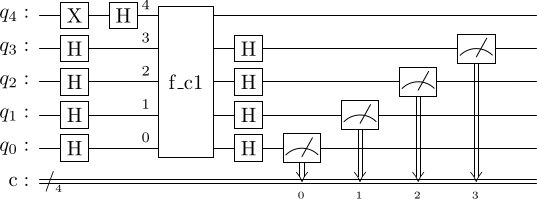

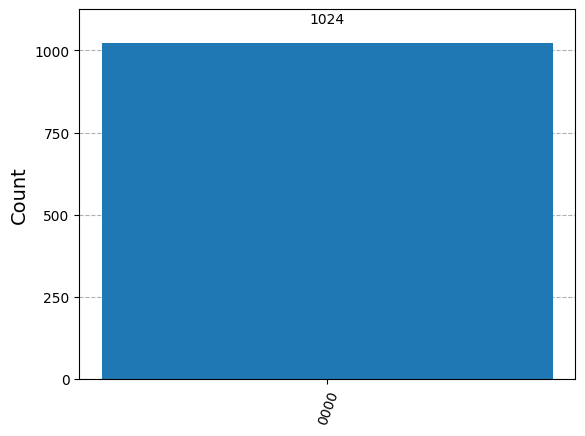

In [70]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_4qb_c1.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_4qb_c1, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_4qb_c1))

### Segunda función constante

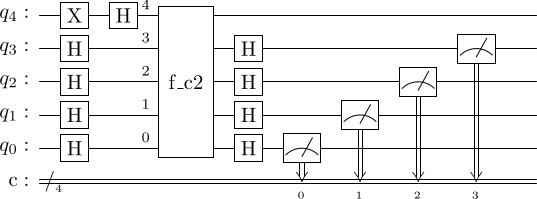

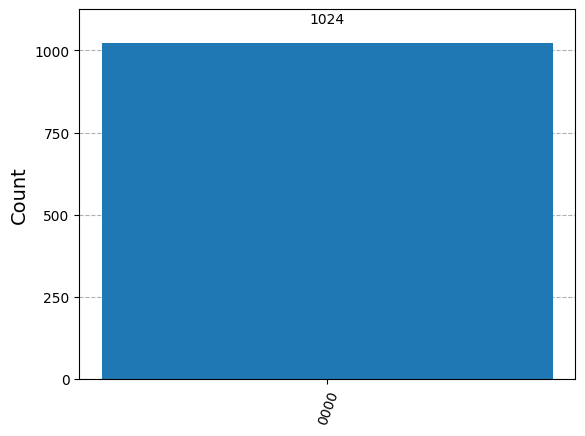

In [71]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_4qb_c2.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_4qb_c2, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_4qb_c2))

### Primera función balanceada

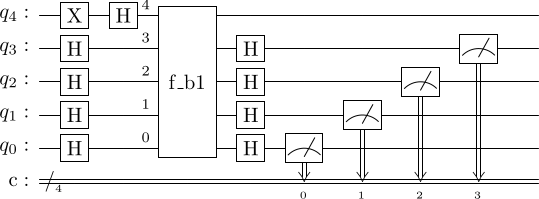

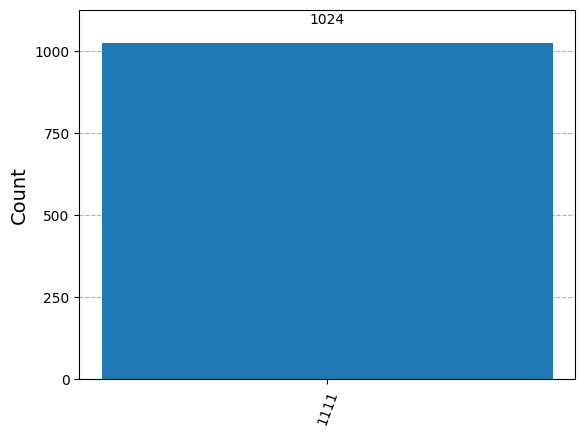

In [72]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_4qb_b1.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_4qb_b1, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_4qb_b1))

### Segunda función balanceada

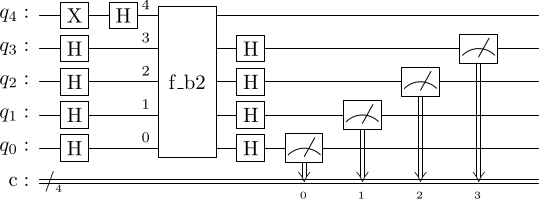

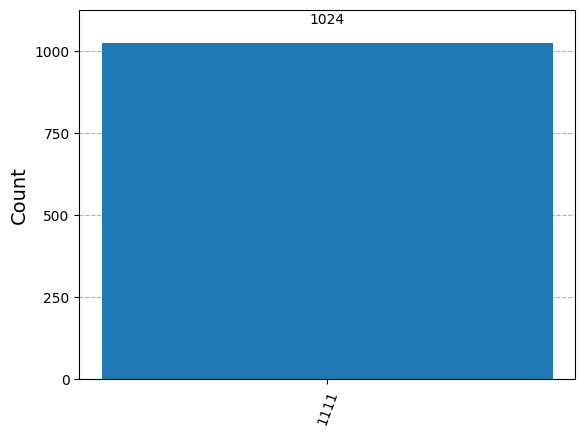

In [73]:
# Mostramos, simulamos y presentamos resultados del primer circuito ctr
display(circ_4qb_b2.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_4qb_b2, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_4qb_b2))

### Función ni balanceada ni constante

Para probar qué ocurre con una función que no es ni balanceada ni constante, se ha decidido aplicar una puerta Toffoli. Podemos observar que los resultados son inconclusivos.

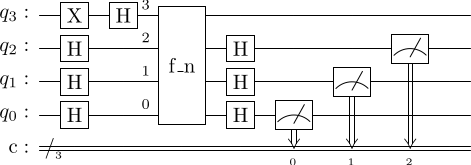

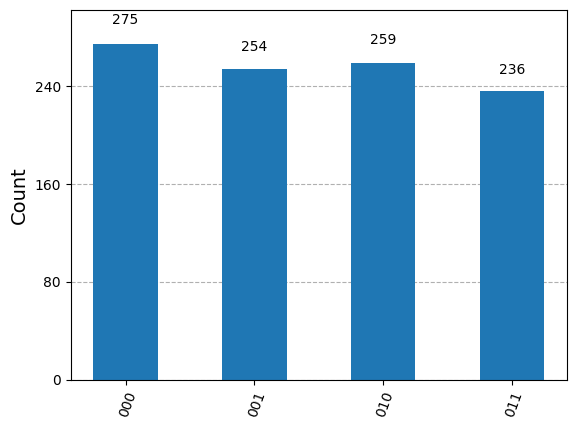

In [74]:
n = 3

# Definimos una funcion oraculo que no es ni constante ni balanceada
oracle_neither = QuantumCircuit(n + 1)
oracle_neither.ccx(0, 1, n)
oracle_neither = oracle_neither.to_gate(label='f_n')

circ_3qb_un = deutsch_jozsa_nqb(n, oracle_neither)

# Mostramos, simulamos y presentamos resultados del circuito
display(circ_3qb_un.draw(output='latex', reverse_bits=True))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ_3qb_un, simulator))
result = job.result()
plot_histogram(result.get_counts(circ_3qb_un))

# Ejercicio 2 - Ejecución en backend real

Para este apartado se ha elegido ejecutar una funcion de cada tipo para cada uno de los numeros de qubits de datos. Además tambien se ha decidido ejecutar el ultimo circuito en el que se usa una funcion que no es ni constante ni balanceada.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Auth token for IBM Quantum
token = ""

service = QiskitRuntimeService(channel="ibm_quantum", token=token)

print("Backends disponibles:", service.backends())

backend = service.least_busy(simulator=False, operational=True)
#backend = service.backend('ibm_brisbane')

Backends disponibles: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]


### Con 2 qubits

job id: d089xfdrxz8g00892dsg
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-29 09:41:25', stop='2025-04-29 09:41:25', size=100>)])}, 'version': 2})
{'00': 1, '11': 92, '10': 5, '01': 2}


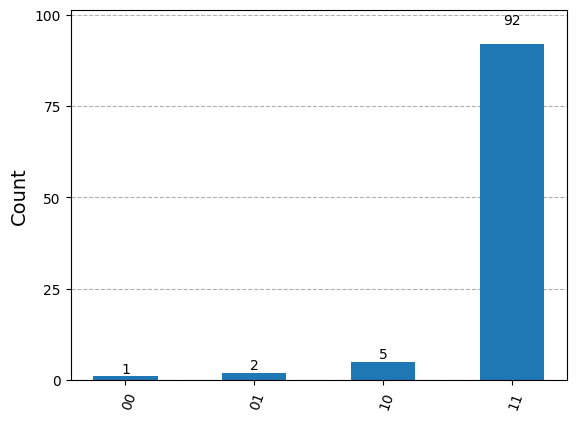

In [76]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ_2qb_b1)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

job id: d089xnykzhn0008tk3fg
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-29 09:41:47', stop='2025-04-29 09:41:48', size=100>)])}, 'version': 2})
{'00': 100}


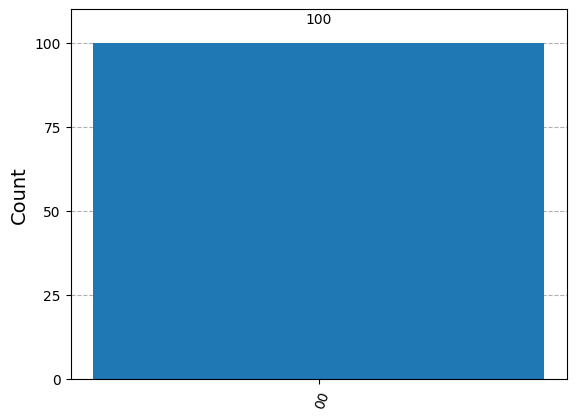

In [77]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ_2qb_c2)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

### Con 3 qubits

job id: d089xtzqnmvg008xjrw0
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-29 09:42:44', stop='2025-04-29 09:42:45', size=100>)])}, 'version': 2})
{'001': 1, '111': 97, '110': 2}


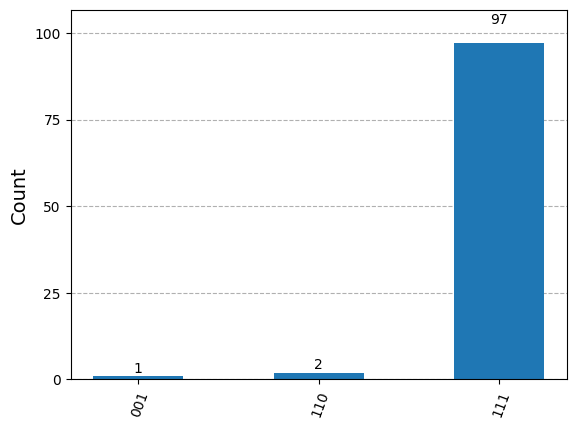

In [78]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ_3qb_b2)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

job id: d089y7r6rr3g0088gxzg
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-29 09:42:59', stop='2025-04-29 09:43:00', size=100>)])}, 'version': 2})
{'000': 93, '100': 5, '010': 2}


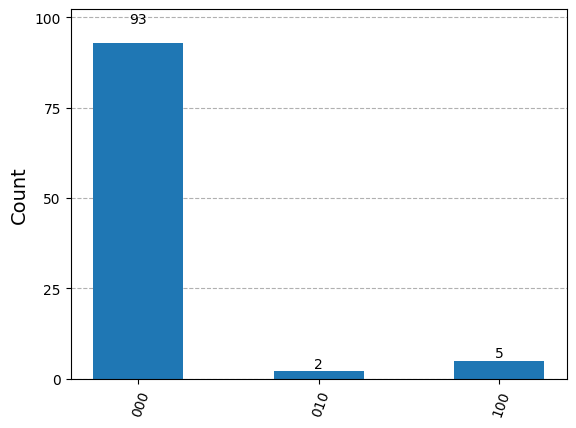

In [79]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ_3qb_c1)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

job id: d089yb9nhqag008qrhpg
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-29 09:43:13', stop='2025-04-29 09:43:14', size=100>)])}, 'version': 2})
{'011': 24, '010': 29, '001': 15, '000': 32}


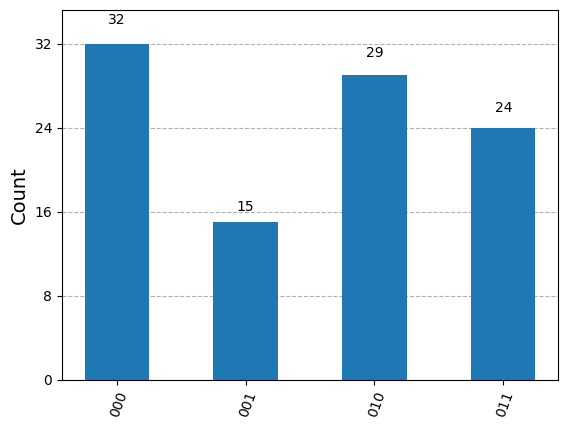

In [80]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ_3qb_un)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

### 4 qubits

job id: d08a0gjkzhn0008tk3zg
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-29 09:47:50', stop='2025-04-29 09:47:50', size=100>)])}, 'version': 2})
{'0000': 2, '1111': 80, '1011': 5, '1110': 4, '0011': 5, '0101': 1, '1010': 1, '1001': 1, '1101': 1}


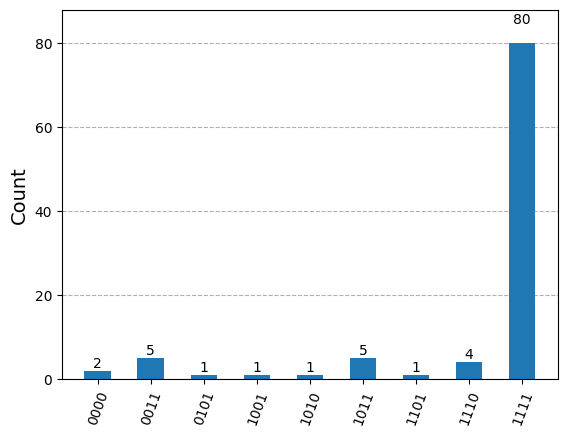

In [83]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ_4qb_b2)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

job id: d089ykad8drg008wtr4g
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-29 09:43:46', stop='2025-04-29 09:43:47', size=100>)])}, 'version': 2})
{'0000': 83, '0010': 1, '1000': 11, '0100': 5}


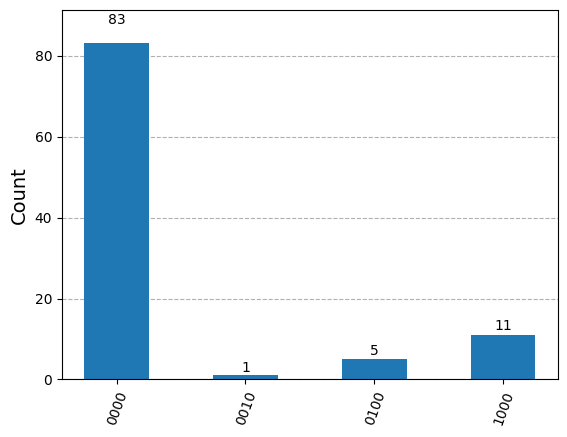

In [82]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ_4qb_c2)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))